In [53]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import plotly.graph_objects as go
import plotly.express as px
import numpy as np


In [54]:
plt.style.use('ggplot')
# What date range do you want to see?
# From when to now

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
print(end)

2020-05-05 18:22:11.260839


In [55]:
i = input()
df = web.DataReader(i, "yahoo", start, end)
# Import Stock Data   
df.reset_index(inplace=True)
df.set_index("Date", inplace=False)

# Save stock Data to CSV
df.to_csv(i + '.csv')
data_df = pd.read_csv(i +'.csv', parse_dates=True, index_col=0)
# Line Graph that shows Volume
fig = px.line(data_df, x="Date", y="Volume", template="plotly_dark")
fig.update_layout(title= i)
fig.show()
# Line Graph that shows adj close
fig = px.line(data_df, x="Date", y="Adj Close", template="plotly_dark")
fig.update_layout(title= i)
fig.show()
# H-L graph compare
date = data_df['Date']
high = data_df['High']
low = data_df['Low']

fig = go.Figure()
fig.add_trace(go.Scatter(x=date, y=high,
                    mode='lines',
                    name='High'))
fig.add_trace(go.Scatter(x=date, y=low,
                    mode='lines',
                    name='Low'))
fig.update_layout(title= i, template="plotly_dark")
fig.show()
# 100 day moving average
df = pd.read_csv(i + '.csv', parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

date = data_df['Date']
adjclose = data_df['Adj Close']
movingavg = df['100ma']


fig = go.Figure()
fig.add_trace(go.Scatter(x=date, y=adjclose,
                    mode='lines',
                    name='Adjusted Close'))
fig.add_trace(go.Scatter(x=date, y=movingavg,
                    mode='lines',
                    name='100MA'))
fig.update_layout(title= i, template="plotly_dark")
fig.show()



fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(title= i, template="plotly_dark")
fig.show()

# df

In [56]:

# Create more data
df['Increase_Decrease'] = np.where(df['Volume'].shift(-1) > df['Volume'],1,-1)
df['Buy_Sell_on_Open'] = np.where(df['Open'].shift(-1) > df['Open'],1,-1)
df['Buy_Sell'] = np.where(df['Adj Close'].shift(-1) > df['Adj Close'],1,-1)
df['Returns'] = df['Adj Close'].pct_change()
dataset = df.dropna()
dataset.shape


(1343, 12)

In [57]:
print("Mean Values in the Distribution")
print("-"*35)
print(dataset.mean())
print("***********************************")
print("Median Values in the Distribution")
print("-"*35)
print(dataset.median())

Mean Values in the Distribution
-----------------------------------
High                 2.980173e+02
Low                  2.866010e+02
Open                 2.923616e+02
Close                2.924799e+02
Volume               7.488442e+06
Adj Close            2.924799e+02
100ma                2.763314e+02
Increase_Decrease   -6.180194e-02
Buy_Sell_on_Open     4.095309e-02
Buy_Sell             1.712584e-02
Returns              1.471193e-03
dtype: float64
***********************************
Median Values in the Distribution
-----------------------------------
High                 2.680000e+02
Low                  2.600200e+02
Open                 2.640000e+02
Close                2.645300e+02
Volume               5.750800e+06
Adj Close            2.645300e+02
100ma                2.537319e+02
Increase_Decrease   -1.000000e+00
Buy_Sell_on_Open     1.000000e+00
Buy_Sell             1.000000e+00
Returns              7.385224e-04
dtype: float64


In [58]:
print("Measuring Standard Deviation")
print(dataset.std())

Measuring Standard Deviation
High                 1.153477e+02
Low                  1.063565e+02
Open                 1.108987e+02
Close                1.107817e+02
Volume               5.685448e+06
Adj Close            1.107817e+02
100ma                7.025131e+01
Increase_Decrease    9.984602e-01
Buy_Sell_on_Open     9.995333e-01
Buy_Sell             1.000226e+00
Returns              3.283329e-02
dtype: float64


In [59]:
print("Measuring Skewness")
print(dataset.skew())

Measuring Skewness
High                 2.804637
Low                  2.683040
Open                 2.761760
Close                2.733355
Volume               2.799684
Adj Close            2.733355
100ma                1.692184
Increase_Decrease    0.123979
Buy_Sell_on_Open    -0.082067
Buy_Sell            -0.034295
Returns              0.266002
dtype: float64


In [60]:
import math
import matplotlib.mlab as mlab

# Define Variables
mu = dataset['Returns'].mean() # Mean Returns
sigma = dataset['Returns'].std() # Volatility

In [61]:
[n,bins,patches] = plt.hist(dataset['Returns'], 100)
# Daily returns using normal distribution
s = mlab.normpdf(bins, mu, sigma)
# Create the bins and histogram
plt.plot(bins, s, color='y', lw=2)
plt.title("Stock Returns on Normal Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

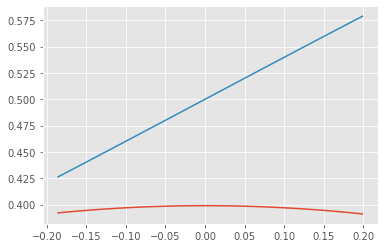

In [62]:

from scipy.stats import norm

mu = dataset['Returns'].mean()
sigma = dataset['Returns'].std()

x_min = dataset['Returns'].min()
x_max = dataset['Returns'].max()



def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    x = x_range
    if cdf:
        y = norm.cdf(x, mu, sigma)
    else:
        y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    
x = np.linspace(x_min, x_max, 100)
plot_normal(x)
plot_normal(x, cdf=True)

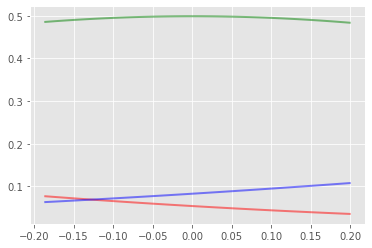

In [63]:

plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1.2, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 0.8, color='green', lw=2, ls='-', alpha=0.5)

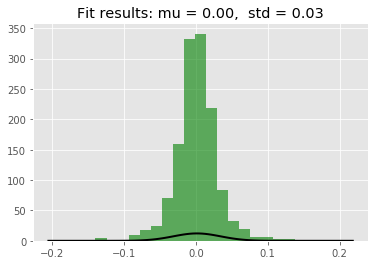

In [64]:
mu, std = norm.fit(dataset['Returns'])

# Plot the histogram.
plt.hist(dataset['Returns'], bins=25, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [65]:
from scipy.stats import binom

n = 10 # number of trials
p = 0.5 # probaility of success and failure
k = np.arange(0,21) # * number of repeat the trial
binomial = binom.pmf(k, n, p)
binomial

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

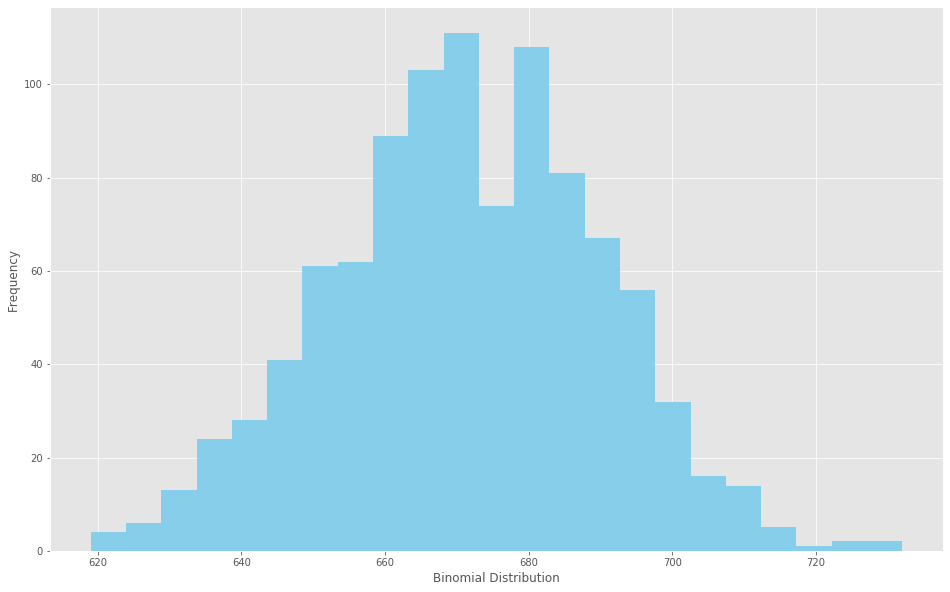

In [66]:
import seaborn as sns
data_binom = binom.rvs(n=len(dataset['Adj Close']),p=0.5,size=1000)

plt.figure(figsize=(16,10))
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

In [67]:
# from scipy.stats import poisson

# mu = dataset['Returns'].mean()
# dist = poisson.rvs(mu=mu, loc=0, size=1000)
# print("Mean: %g" % np.mean(dataset['Returns']))
# print("SD: %g" % np.std(dataset['Returns'], ddof=1))

# plt.hist(dist, bins=10, normed=True)
# #plt.xlabel()
# plt.title('Poisson Distribution Curve')
# plt.show()

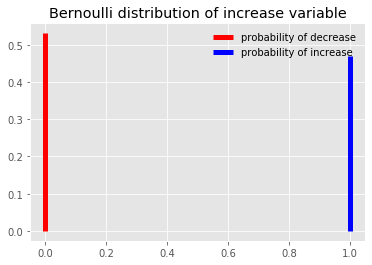

In [68]:
from scipy.stats import bernoulli

countIncrease = dataset[dataset.Increase_Decrease == 1].Increase_Decrease.count()
countAll = dataset.Increase_Decrease.count()

Increase_dist = bernoulli(countIncrease / countAll)
# the given value is the probability of outcome 1 (increase) (let's call it p). # The probability of the opposite outcome (0 - decrease) is 1 - p.

_, ax = plt.subplots(1, 1)
ax.vlines(0, 0, Increase_dist.pmf(0), colors='r', linestyles='-', lw=5, label="probability of decrease")
ax.vlines(1, 0, Increase_dist.pmf(1), colors='b', linestyles='-', lw=5, label="probability of increase")
ax.legend(loc='best', frameon=False)
plt.title("Bernoulli distribution of increase variable")
plt.show()

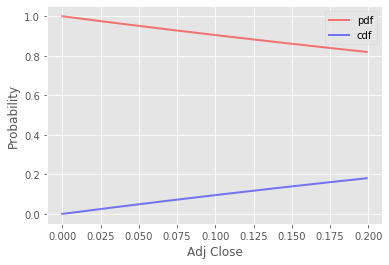

In [69]:
from scipy.stats import expon

mu = dataset['Returns'].mean()
sigma = dataset['Returns'].std()

x_m = dataset['Returns'].max()

def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    if cdf:
        y = expon.cdf(x, mu, sigma)
    else:
        y = expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    

x = np.linspace(0, x_m, 5000)
plot_exponential(x, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.xlabel('Adj Close')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()

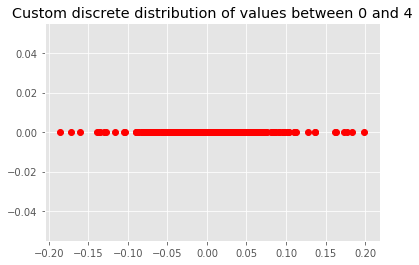

In [70]:
from scipy.stats import rv_discrete
from fbprophet import Prophet

increase_probability = pd.DataFrame({'probability': dataset.groupby(by = "Increase_Decrease", as_index=False).size() / dataset.Increase_Decrease.count()}).reset_index()

values = increase_probability.Increase_Decrease
probabilities = increase_probability.probability
custom_discrete_dist = rv_discrete(values=(values, probabilities))

x = dataset['Returns']

_, ax = plt.subplots(1, 1)
ax.plot(x, custom_discrete_dist.pmf(x), 'ro', lw=2)
plt.title('Custom discrete distribution of values between 0 and 4')
plt.show()

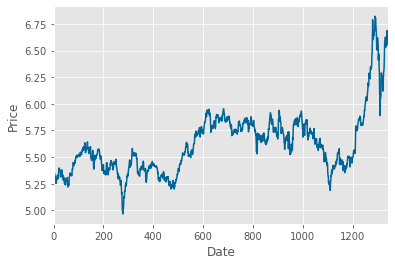

In [71]:
df = df.reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
df['y'] = pd.DataFrame(np.log(df['y']))

# plot data
ax = df['y'].plot(color='#006699');
ax.set_ylabel('Price');
ax.set_xlabel('Date');
plt.show()

In [72]:

# train test split
df_train = df[:740]
df_test = df[740:]

In [73]:
# Model Fitting
# instantiate the Prophet class
mdl = Prophet(interval_width=0.95, daily_seasonality=True)
 
# fit the model on the training data
mdl.fit(df_train)
 
# define future time frame
future = mdl.make_future_dataframe(periods=24, freq='MS')

In [74]:
forecast = mdl.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
759,2019-08-01,6.716299,-0.521290,14.323254
760,2019-09-01,6.682248,-1.387455,14.947504
761,2019-10-01,6.704626,-2.061300,15.484554
762,2019-11-01,6.603225,-2.688923,16.084054
763,2019-12-01,6.595434,-3.309042,16.485356


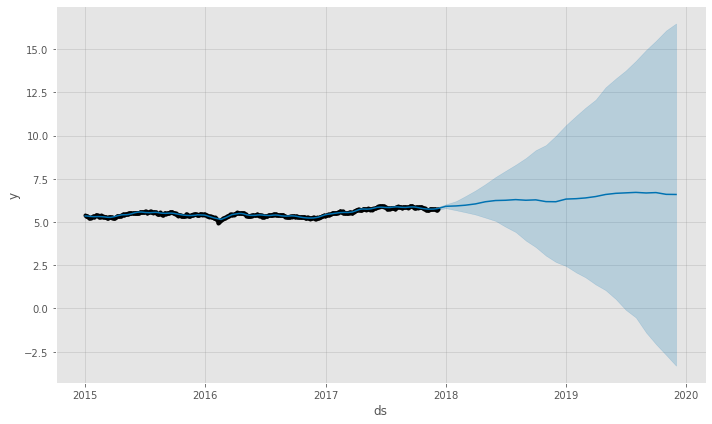

In [75]:
mdl.plot(forecast);
plt.show()

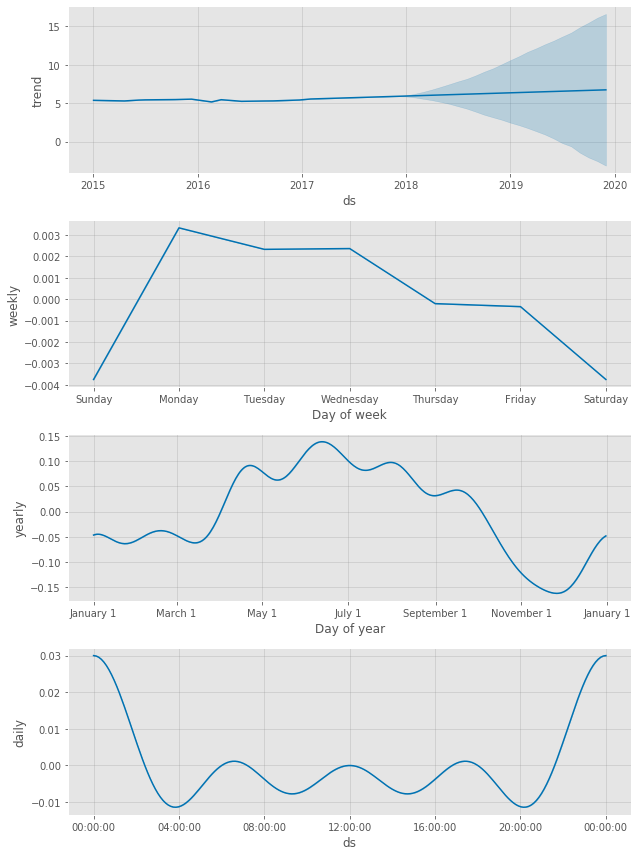

In [76]:
mdl.plot_components(forecast)
plt.show()

In [77]:
y_hat = np.exp(forecast['yhat'][740:])
y_true = np.exp(df['y'])
 
# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 92726.32 MSE (304.51 RMSE)


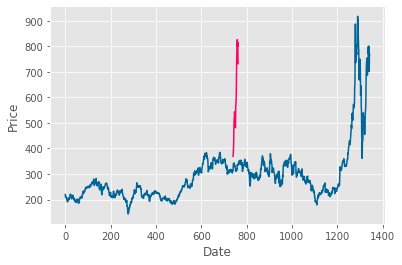

In [78]:
plt.plot(y_true, label='Original', color='#006699');
plt.plot(y_hat, color='#ff0066', label='Forecast');
plt.ylabel('Price');
plt.xlabel('Date');
plt.show()